<a href="https://colab.research.google.com/github/shanshanli806/Artificial-Intelligence/blob/main/Assignment02/CSc448_A02.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

According to dataset provided by the World Health Organization, an average of 800,000 people commit suicide each year worldwide. As a result, suicide has become one of the most frequent means of death. Many countries lack preventive measures.

For this project, the dataset will be pull from the World Health Organization (WHO). The dataset is based on the suicide rate of over 100 countries all over the world between the years 1958 - 2016. We will analyze the suicide rate for each country based on different age groups and genders.

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### data description
---
**country** : 101 countries included in dataset.

**year** : from years 1985 to 2016
 
**sex** : male  //  female

**age** : 5-14years  //  15-24years  //  25-34years  //  35-54years  //  55-74years  //  75+years

**suicides_no** : number of suicides committed

**population** : population
    
**suicides/100k pop** : number of suicides committed per 100,000 people in population

**gdp_per_capita** : gdp per capita in USD

---

In [3]:
# imports dataset from local csv file
dataset = pd.read_csv('master.csv')
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
#pulling out necessary variables used
dataset = dataset[['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']] 

In [5]:
# finding the total # of countries in the dataset
countries = dataset['country'].unique()
countries

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [ ]:
#number of countries in the dataset
countries.shape

There are a total of 101 countries listed in the dataset.

### Suicide Ratio Worldwide
---

In [ ]:
#gets the ratio of suicides committed each year
by_Year = dataset.groupby(by = ['year'])['suicides/100k pop'].mean().reset_index()

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(x='year', y = 'suicides/100k pop', data=by_Year)
plt.xlabel('Year')
plt.ylabel('Suicides per 100k people')
plt.title('Worldwide Suicide Ratio from 1985 to 2016')

In [ ]:
# year with the highest suicide rates
by_Year[by_Year['suicides/100k pop'] == np.max(by_Year['suicides/100k pop'])]

In [ ]:
# year with the lowest suicide rates
by_Year[by_Year['suicides/100k pop'] == np.min(by_Year['suicides/100k pop'])]

In [ ]:
countries = dataset.groupby(by = ['country', 'year'])['suicides_no'].sum().reset_index()

In [ ]:
#g = sns.FacetGrid(countries, col="country", col_wrap=6)
#g = g.map(plt.scatter, "year", "suicides_no", marker=".")

1995 is the year with the highest suicide rates, whereas 2014 is the year with the lowest suicide rates. So Let's go more in depth into these dataset to see the difference.

## TOP 5 countries with the highest suicide rate in 1995
---


Here, we are pulling/filtering out dataset from 1995 only for analysis.

In [ ]:
#countries for only 1995.
only_1995 = dataset[dataset['year']==1995]
countries_1995 = only_1995.groupby(by = ['country'])['suicides_no'].sum().reset_index()

#the suicide_no/sum of suicides_no worldwide in 1995
countries_1995['percentage'] = countries_1995['suicides_no']/countries_1995['suicides_no'].sum()

In [ ]:
#    The 5 Countries with the HIGHEST suicides number in 1995
countries_1995.sort_values('suicides_no', ascending=False).head(5)

1995 was the peak global suicide rate, with 16 per 100,000 people committing suicide. Most of these people came from Russia, the United States, Japan, Ukraine, and Germany. 

From the table above we can see that the country with the highest number of suicide committed is Russian Federation following next with United States and Japan in 1995. Russia reached up to a total of 60,548 suicides, accounting for 25% of the total global suicides in 1995. Making up majority of the world’s suicide average.

## TOP 5 countries with the highest suicide rate in 2014
---

Here, we are pulling/filtering out dataset from 2014 only for analysis.

In [ ]:
#countries for only 2014
only_2014 = dataset[dataset['year']==2014]
countries_2014 = only_2014.groupby(by = ['country'])['suicides_no'].sum().reset_index()

#the suicide_no/sum of suicides_no worldwide in 2014
countries_2014['percentage'] = countries_2014['suicides_no']/countries_2014['suicides_no'].sum()

In [ ]:
#    The 5 Countries with the HIGHEST suicides number in 2014
countries_2014.sort_values('suicides_no', ascending=False).head(5)

Having 2014 as the year with the lowest suicide rate, from the table above we can see still see that the top 3 countries with the highest number of suicide committed is still United States, Russian Federation and Japan. However, the suicide ratio for United States clearly went up from 13% in 1995 to 19% in 2014. 

### Suicide Rate between Male and Female
---

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x='sex', y='suicides_no', hue='age', data=dataset)
plt.xlabel('Sex')
plt.ylabel('Suicides Number')
plt.title('Suicide Rate -- Male vs Female by AGE')

The bargraph above shows the number of suicides commmited between male and female by different age groups. Looking at the data demographically, the suicide rate of males is much higher than that of females. The suicide rate in males is 14.85% higher than that in females. The highest number of suicides among males fell between the ages of 35 and 54. 

## AI MEME
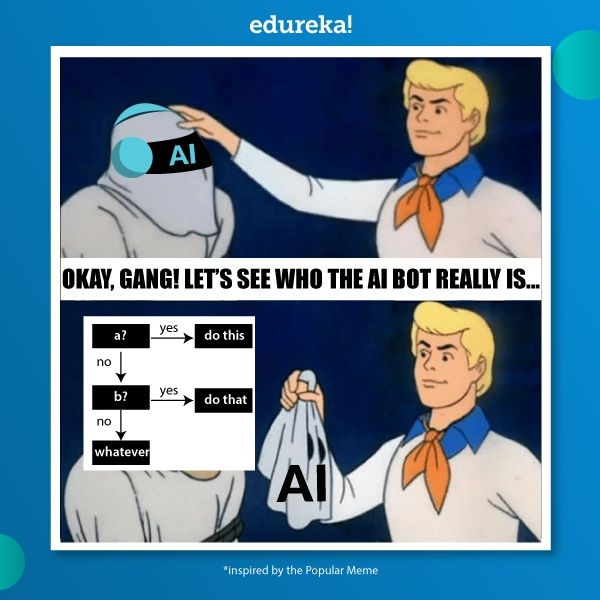